In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
dataset=pd.read_csv("/content/drive/MyDrive/Artificial Intelligence /CoLab /Dataset/Dhaka Rent - Dhaka Rent.csv")

In [7]:
dataset.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [9]:
dataset.shape

(60, 2)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Area vs Rent')

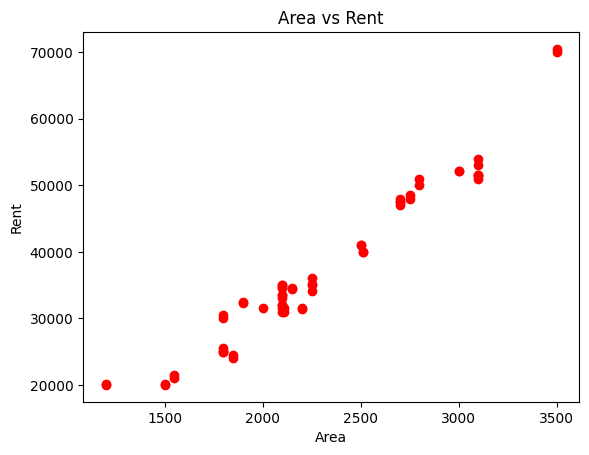

In [14]:
plt.scatter(dataset['area'],dataset["rent"],color="red")
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Area vs Rent")

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset[['area']],dataset[['rent']],test_size=0.25,random_state=0)

In [19]:
xtrain.head()

,area
43,2510
49,2700
7,1850
14,2250
32,2500


In [20]:
ytrain.head()

,rent
43,40000
49,47500
7,24500
14,34100
32,41100


In [22]:
LinReg=LinearRegression()

In [24]:
LinReg.fit(xtrain,ytrain)

LinearRegression()

In [25]:
LinReg.coef_

array([[20.87611375]])

In [26]:
LinReg.intercept_

array([-10452.20563527])

In [28]:
LinReg.predict(xtest)

array([[46957.10717482],
       [29212.41048807],
       [54263.74698702],
       [35475.2446128 ],
       [33387.63323789],
       [41738.07873754],
       [52176.1356121 ],
       [35475.2446128 ],
       [34431.43892535],
       [62614.19248667],
       [52176.1356121 ],
       [34431.43892535],
       [33387.63323789],
       [33387.63323789],
       [36519.05030026]])

In [29]:
LinReg.score(xtrain,ytrain)


0.9506978371032111

In [31]:
LinReg.score(xtest,ytest)

0.9403542244869332

In [35]:
dataset["prediction"]=LinReg.predict(dataset[['area']])
dataset['Residuals']=dataset['rent']-dataset['prediction']

In [37]:
dataset.head()

,area,rent,prediction,Residuals
0,2000,31500,31300.021863,199.978137
1,2100,35000,33387.633238,1612.366762
2,2500,41050,41738.078738,-688.078738
3,2250,36100,36519.050300,-419.050300
4,3000,52100,52176.135612,-76.135612


In [39]:
from sklearn.metfrics import mean_squared_error
from sklearn.metfrics import mean_absolute_error
from sklearn.metfrics import r2_score

In [41]:
#MSE
mse=mean_squared_error(dataset['rent'],dataset['prediction'])
print("mse = ",mse)
#MAE
mae=mean_absolute_error(dataset['rent'],dataset['prediction'])
print("mae = ", mae)
#R2
r2=r2_score(dataset['rent'],dataset['prediction'])
print('r2 = ',r2)
#RMSE
rmse=np.sqrt(mse)
print("rmse = ",rmse)

mse =  6831726.630138651
mae =  2027.5951446567508
r2 =  0.9498555972671737
rmse =  2613.7571865302734


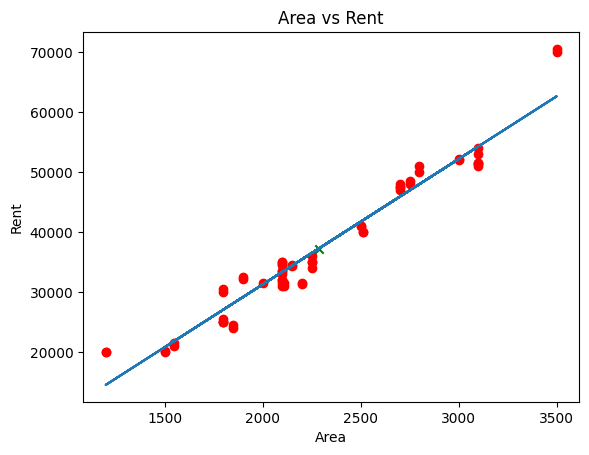

In [47]:
plt.plot(dataset['area'],dataset['prediction'])
plt.scatter(dataset['area'],dataset['rent'],color="red")
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Area vs Rent")
plt.scatter(np.mean(dataset['area']), np.mean(dataset['rent']), color='green', marker='x')